# Clothes Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We are going to use a new version of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Fashion MNIST (https://pravarmahajan.github.io/fashion/) and is a dataset of small images of clothes and accessories.



The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## TODO: Insert your surname, name and ID number

Student name: <b>Ardino Rocco</b>
    
ID: <b>1231629</b>

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as skm

In [2]:
# helper function to load Fashion MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 1231629 #Place your ID/seed
np.random.seed(ID)

In [4]:
#load the Fashion MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [43 49 58 38 59 43 47 59 54 50]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


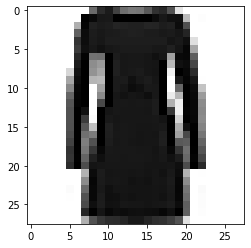

LABEL: 3
INPUT:


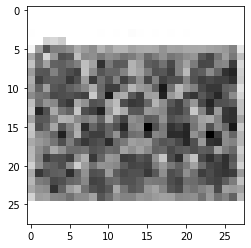

LABEL: 8
INPUT:


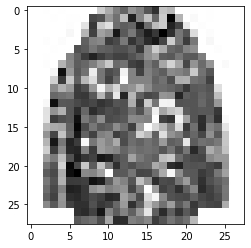

LABEL: 4
INPUT:


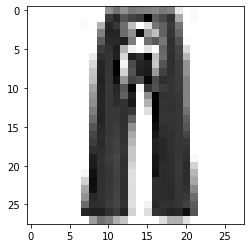

LABEL: 1


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,5000)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.0005, 0.005, 0.05, 0.5, 5, 50, 500]}

#run linear SVM
lin = SVC(kernel='linear')
clf_lin = GridSearchCV(lin, parameters, cv=4)
clf_lin.fit(X_train, y_train)

#ADD YOUR CODE


print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:")
#ADD YOUR CODE
print(clf_lin.best_params_)

print("Score with best parameters:")
#ADD YOUR CODE
print(clf_lin.best_score_)

print("All scores on the grid:")
#ADD YOUR CODE
print(clf_lin.cv_results_['mean_test_score'])

C:\Users\39349\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR LINEAR KERNEL
Best parameters set found:
{'C': 0.05}
Score with best parameters:
0.822
All scores on the grid:
[0.386 0.776 0.822 0.806 0.806 0.806 0.806]


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of degree 2 kernel

#ADD YOUR CODE
pol2 = SVC(kernel='poly', degree=2)
clf_pol2 = GridSearchCV(pol2, parameters, cv=4)
clf_pol2.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:")
#ADD YOUR CODE
print(clf_pol2.best_params_)

print("Score with best parameters:")
#ADD YOUR CODE
print(clf_pol2.best_score_)

print("\nAll scores on the grid:")
#ADD YOUR CODE
print(clf_pol2.cv_results_['mean_test_score'])

C:\Users\39349\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found:
{'C': 0.05, 'gamma': 0.5}
Score with best parameters:
0.796

All scores on the grid:
[0.794 0.796 0.796 0.796 0.796 0.796 0.796 0.796 0.796]


## TO DO 3

Now let's try a higher degree for the polynomial kernel.

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of higher degree kernel
degree = 3

#ADD YOUR CODE
pol3 = SVC(kernel='poly', degree=degree)
clf_pol3 = GridSearchCV(pol3, parameters, cv=4)
clf_pol3.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("Best parameters set found:")
#ADD YOUR CODE
print(clf_pol3.best_params_)

print("Score with best parameters:")
#ADD YOUR CODE
print(clf_pol3.best_score_)

print("\nAll scores on the grid:")
#ADD YOUR CODE
print(clf_pol3.cv_results_['mean_test_score'])

C:\Users\39349\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR POLY DEGREE= 3  KERNEL
Best parameters set found:
{'C': 0.05, 'gamma': 0.05}
Score with best parameters:
0.778

All scores on the grid:
[0.778 0.77  0.77  0.774 0.77  0.77  0.77  0.77  0.77 ]


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}

#run SVM with rbf kernel

#ADD YOUR CODE
rbf = SVC(kernel='rbf')
clf_rbf = GridSearchCV(rbf, parameters, cv=4)
clf_rbf.fit(X_train, y_train)

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:")
#ADD YOUR CODE
print(clf_rbf.best_params_)

print("Score with best parameters:")
#ADD YOUR CODE
print(clf_rbf.best_score_)

print("\nAll scores on the grid:")
#ADD YOUR CODE
print(clf_rbf.cv_results_['mean_test_score'])

RESULTS FOR rbf KERNEL
Best parameters set found:
{'C': 5, 'gamma': 0.005}
Score with best parameters:
0.816

All scores on the grid:
[0.76  0.698 0.126 0.188 0.816 0.766 0.15  0.124 0.814 0.766 0.15  0.124
 0.814 0.766 0.15  0.124]


C:\Users\39349\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## TO DO5
What do you observe when using RBF and polynomial kernels on this dataset ?

### ANSWER TO THE QUESTION

The best result is obtained with rbf kernel. In this case, the best score ($\sim 0.784$) is obtained with $C=50$ and $\gamma = 0.005$. However, the scores for every kernel are not so different, in particular, it is possible to see that the score decreases when the degree of the polinomial kernel increases.

## TO DO 6
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV
best_SVM = clf_rbf



training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.050000
Best SVM test error: 0.215664


## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [13]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [204 215 179 213 196 225 210 174 187 197]


Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the TO DO 9 cell below.

### TO DO 7

In [14]:
#get training and test error for the best SVM model from CV

# ADD YOUR CODE
# parameters for rbf SVM
parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}

rbf = SVC(kernel='rbf')
clf_rbf = GridSearchCV(rbf, parameters, cv=4)
clf_rbf.fit(X_train, y_train)

training_error = 1. - clf_rbf.score(X_train,y_train)
test_error = 1. - clf_rbf.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.060000
Best SVM test error: 0.163552


In [15]:
print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:")
#ADD YOUR CODE
print(clf_rbf.best_params_)

print("Score with best parameters:")
#ADD YOUR CODE
print(clf_rbf.best_score_)

print("\nAll scores on the grid:")
#ADD YOUR CODE
print(clf_rbf.cv_results_['mean_test_score'])

RESULTS FOR rbf KERNEL
Best parameters set found:
{'C': 5, 'gamma': 0.005}
Score with best parameters:
0.8315

All scores on the grid:
[0.767  0.782  0.1125 0.1125 0.8315 0.822  0.1625 0.1125 0.8215 0.822
 0.1625 0.1125 0.821  0.822  0.1625 0.1125]


Just for comparison, let's also use logistic regression (with standard parameters from scikit-learn, i.e. some regularization is included).

### TO DO 8 Try first without regularization (use a very large large C)

In [16]:
from sklearn import linear_model
from sklearn import metrics

### ADD YOUR CODE
reg = linear_model.LogisticRegression(C=1e10)
reg.fit(X_train, y_train)

# prediction on train data
y_train_prediction = reg.predict(X_train)
accuracy_train = metrics.accuracy_score(y_train_prediction, y_train)

# prediction on test data
y_test_prediction = reg.predict(X_test)
accuracy_test = metrics.accuracy_score(y_test_prediction, y_test)

training_error = 1 - accuracy_train
test_error = 1 - accuracy_test

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

C:\Users\39349\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\39349\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best logistic regression training error: 0.000000
Best logistic regression test error: 0.235293


### TO DO 9 Then use also some regularization 

In [17]:
regL2 = linear_model.LogisticRegression(C=1)
regL2.fit(X_train, y_train)

# prediction on train data
y_train_prediction = regL2.predict(X_train)
accuracy_train = metrics.accuracy_score(y_train_prediction, y_train)

# prediction on test data
y_test_prediction = regL2.predict(X_test)
accuracy_test = metrics.accuracy_score(y_test_prediction, y_test)

training_error = 1 - accuracy_train
test_error = 1 - accuracy_test

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

C:\Users\39349\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\39349\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best regularized logistic regression training error: 0.038000
Best regularized logistic regression test error: 0.186517


## TO DO 10
Compare and discuss:
- the results from SVM with m=500 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression with and without regularization

### ANSWER TO THE QUESTION

- For $m=500$ the training error for the best choice of hyperparameters is $0.0$ (due to the instability of the algorithm for the small amount of data and to overfit) and the test error is $\sim 0.203$, while for $m=2000$ the training error is $\sim 0.058$ and the test error is $\sim 0.162$. So the performances of the algorithm improve with a larger dataset, however the run time is longer
- Logistic Regression gives a training error of $0.0$ (again, due to instability and to overfit) and a test error of $\sim 0.232$ without regularization, and a training error of $\sim 0.038$ and a test error of $\sim 0.184$ with regularization ($C=1$). It means that the performances improve with regularization since the algorithm is more stable and is less affected by overfit.

So, the SVM method gives better results, however runtime is shorter for Logistic Regression.

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

INPUT:


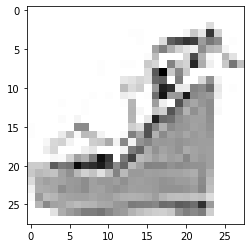

LABEL: 5
Index: 4
LR prediction: 9
SVM prediction: 5


In [18]:
LR_prediction = regL2.predict(X_test) # ADD CODE
SVM_prediction = clf_rbf.predict(X_test) # ADD CODE

# ADD CODE
index = []
for i in range(len(y_test[:1000])):
    if LR_prediction[i]!=y_test[i] and SVM_prediction[i]==y_test[i]:
        index.append(i)

plot_input(X_test,y_test,index[0])
print("Index:", index[0])
print("LR prediction:", LR_prediction[index[0]])
print("SVM prediction:", SVM_prediction[index[0]])

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [19]:
from sklearn.metrics import confusion_matrix

# for better aligned printing of confusion matrix use floatmode='fixed' (not supported in all versions of Python)
np.set_printoptions(precision=2, suppress=True) 

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = confusion_matrix(y_test, SVM_prediction) #ADD CODE
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR = confusion_matrix(y_test, LR_prediction) #ADD CODE
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5796 5785 5821 5787 5804 5775 5790 5826 5813 5803]

 Confusion matrix SVM  
 
 [[4873   24   72  277   13    7  474    1   54    1]
 [  38 5493   44  191    7    0    8    0    3    1]
 [  91    7 4321   53  795    3  510    0   41    0]
 [ 302   69   57 4973  221    0  154    0   11    0]
 [  26    6  524  240 4507    3  481    0   16    1]
 [   1    0    1    9    0 5456    0  171   24  113]
 [1108   20  728  152  574    2 3112    0   92    2]
 [   0    0    0    0    0  654    0 4813    9  350]
 [  27    7   37   37   20   61  122   32 5461    9]
 [   1    0    0    3    0   96    0  195    3 5505]]

 Confusion matrix SVM (normalized)   
 
 [[0.84 0.   0.01 0.05 0.   0.   0.08 0.   0.01 0.  ]
 [0.01 0.95 0.01 0.03 0.   0.   0.   0.   0.   0.  ]
 [0.02 0.   0.74 0.01 0.14 0.   0.09 0.   0.01 0.  ]
 [0.05 0.01 0.01 0.86 0.04 0.   0.03 0.   0.   0.  ]
 [0.   0.   0.09 0.04 0.78 0.   0.08 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.94 0.   0.03 0. 

## TO DO 12
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.

### ANSWER TO THE QUESTION


The accuracies obtained by SVM method are:

| Label | Description | Accuracy with SVM | Accuracy with LR |
| --- | --- | --- | --- |
| 0 | T-shirt/top | 0.84 | 0.78 |
| 1 | Trouser | 0.95 | 0.96 |
| 2 | Pullover | 0.74 | 0.69 |
| 3 | Dress | 0.86 | 0.82 |
| 4 | Coat | 0.78 | 0.74 |
| 5 | Sandal | 0.94 | 0.89 |
| 6 | Shirt | 0.54 | 0.54 |
| 7 | Sneaker | 0.83 | 0.86 |
| 8 | Bag | 0.94 | 0.92 |
| 9 | Ankle boot | 0.95 | 0.94 |

Some classes have lower accuracies than others and the reason could be that the former have a more general shape and the algorithm confuses them with other similar shapes.